# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from scipy.stats import norm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
#remover outliers
num1 = df['Preco_Normal'].quantile(0.25)
num3 = df['Preco_Normal'].quantile(0.75)
iqr = num3 - num1
limite_inferior = num1 - 1.5 * iqr
limite_superior = num3 + 1.5 * iqr
df = df[(df['Preco_Normal'] >= limite_inferior) & (df['Preco_Normal'] <= limite_superior)]
#Descobrir a media
precos_media = df.groupby('Categoria')['Preco_Normal'].mean()
print(precos_media)

Categoria
belleza-y-cuidado-personal    1522.387931
comidas-preparadas            2896.295455
congelados                    1980.965368
frutas                        1376.388889
instantaneos-y-sopas           765.491228
lacteos                       1298.250000
verduras                      1343.296875
Name: Preco_Normal, dtype: float64


In [4]:
#Seu código aqui para a mediana
precos_mediana = df.groupby('Categoria')['Preco_Normal'].median()
print(precos_mediana)

Categoria
belleza-y-cuidado-personal    1559.0
comidas-preparadas            3290.0
congelados                    1490.0
frutas                        1120.0
instantaneos-y-sopas           439.0
lacteos                        619.0
verduras                      1180.0
Name: Preco_Normal, dtype: float64


Digite aqui as categorias:

Categorias com média menor que a mediana:
comidas-preparadas

Categorias com média maior que a mediana:

congelados, frutas, instantaneos-y-sopas, lacteos, verduras

Categoria onde a média ≈ mediana:
belleza-y-cuidado-personal

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [5]:

#Colocar desvio padrao por categoria de produtos
precos_desvio = df.groupby('Categoria')['Preco_Normal'].std()
print(precos_desvio)

#describe completo de categoria preco normal
precos_describe = df.groupby('Categoria')['Preco_Normal'].describe()
print(precos_describe.to_string())

#o comportamento da media e mediana nas categorias


Categoria
belleza-y-cuidado-personal    1550.192284
comidas-preparadas            1827.608039
congelados                    1891.476274
frutas                         638.239319
instantaneos-y-sopas          1170.232869
lacteos                       1411.253353
verduras                      1012.699625
Name: Preco_Normal, dtype: float64
                            count         mean          std    min      25%     50%      75%     max
Categoria                                                                                           
belleza-y-cuidado-personal  232.0  1522.387931  1550.192284    0.0     0.00  1559.0  2581.75  6869.0
comidas-preparadas           44.0  2896.295455  1827.608039    0.0  2050.00  3290.0  4190.00  6590.0
congelados                  231.0  1980.965368  1891.476274    0.0     0.00  1490.0  3379.00  7090.0
frutas                       18.0  1376.388889   638.239319  645.0   945.00  1120.0  1665.00  2990.0
instantaneos-y-sopas         57.0   765.491228  1170.23

Digite nesse campo o comportamento que você identificou:

Nessas categorias de maior desvio, a média tende a ficar maior que a mediana (indicando cauda longa à direita = muitos valores altos puxando a média).

Exceção: comidas-preparadas, onde a mediana está acima da média, sugerindo alguns valores muito baixos influenciando para baixo a média.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

In [6]:
#como achei muito aberta a pergunta vou fazer um grafico 
# boxplot com base em maior desvio padrão Absoluto e o maior
#  desvio padrao relativo (coeficiente de variação)

#criar boxplot com base em maior desvio padrão Absoluto
absoluto = df.loc[df['Categoria'] == 'congelados']
fig = px.box(
    absoluto,
    x='Categoria',
    y='Preco_Normal',
    title='Boxplot de Preço Normal por Categoria - Maior Desvio Padrão Absoluto',
    labels={'Preco Normal': 'Preço Normal'},
    color='Categoria'
)
fig.show()

#como nesse foi a categoria de congelados que teve o maior desvio padrao absoluto 
#não ouve outliers uma ves que o 

In [7]:
#criar boxplot com base em maior desvio padrão Relativo (coeficiente de variação)

#descobrir coeficiente de variação
cv = precos_desvio / precos_media
print(cv)

relativo = df.loc[df['Categoria']=='instantaneos-y-sopas']

fig = px.box(
    relativo,x='Categoria',
    y='Preco_Normal',
    title='Boxplot de Preço Normal por Categoria - Maior Desvio Padrão Relativo',
    labels={'Preco Normal': 'Preço Normal', 'Categoria': 'Categoria'},
    color='Categoria'
)

fig.show()




Categoria
belleza-y-cuidado-personal    1.018264
comidas-preparadas            0.631016
congelados                    0.954826
frutas                        0.463706
instantaneos-y-sopas          1.528735
lacteos                       1.087043
verduras                      0.753891
Name: Preco_Normal, dtype: float64


atravez do grafico podemos ver que a categoria instantaneos-y-sopas
tem varios outliers que podem ser removidos para uma melhor analise

apois plotar o grafico da para notar de forma clara que existem muitos outlier assima da media e que os preços estão concentrados em faixas baixas, muitos outliers estao com valores altos (até acima de 3000).

Isso confirma minha hipotese de que a uma assimetria positiva: a maioria dos preços é baixa, mas alguns valores muito altos elevam a média e o desvio.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

In [8]:
# criar media do desconto por categoria
df2 = df.dropna()

desconto_medio = df2.groupby('Categoria')['Desconto'].mean()
print(desconto_medio,"\n")

# Verificar se ainda há valores nulos na coluna Desconto após o dropna()
if df2['Desconto'].isnull().any():
    print("Ainda há valores nulos na coluna 'Desconto' após dropna().")
    # Se houver, fazer outro dropna específico
    df2 = df2.dropna(subset=['Desconto'])
else:
    print("Não há valores nulos na coluna 'Desconto'.\n")

fig2 = px.bar(
    desconto_medio,
    x=desconto_medio.index,
    y=desconto_medio.values,
    title='Média de Desconto por Categoria',
    labels={'x': 'Categoria', 'y': 'Média de Desconto'},
    color='Desconto'
)
fig2.show()


Categoria
belleza-y-cuidado-personal    126.797414
comidas-preparadas             45.454545
congelados                    156.696970
frutas                          0.000000
instantaneos-y-sopas            0.000000
lacteos                        19.075980
verduras                        0.000000
Name: Desconto, dtype: float64 

Não há valores nulos na coluna 'Desconto'.



# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [9]:
# Seu código aqui
map = df.groupby(['Categoria','Marca'])['Desconto'].mean().reset_index()

fig = px.treemap(
    map,
    path=['Categoria', 'Marca'],   # hierarquia
    values='Desconto',             # tamanho das caixas
    color='Desconto',              # cor pelo valor do desconto
    title='Média de Desconto por Categoria e Marca'
)

fig.show()

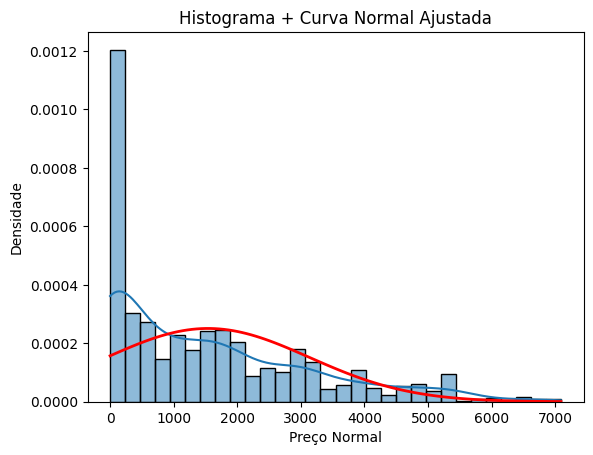

In [10]:
# Selecionar a coluna (exemplo: Preco_Normal)
dados = df['Preco_Normal'].dropna()

# Plotar histograma
sns.histplot(dados, kde=True, stat="density", bins=30)

# Ajustar uma curva normal com mesma média e desvio padrão dos dados
mu, sigma = dados.mean(), dados.std()
x = np.linspace(dados.min(), dados.max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)

plt.title("Histograma + Curva Normal Ajustada")
plt.xlabel("Preço Normal")
plt.ylabel("Densidade")
plt.show()